In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
LightGBM_results = pd.read_excel('LightGBM_results.xlsx')
LSTM_results = pd.read_excel('LSTM_results.xlsx')
Prophet_results = pd.read_excel('Prophet_results.xlsx')
SARIMA_results = pd.read_excel('SARIMA_results.xlsx')
XGBoost_results = pd.read_excel('XGBoost_results.xlsx')

In [3]:
LSTM_results.head()

,Product_ID,Actual,Predicted
0,0,43.0,73.878387
1,0,40.0,75.626968
2,0,58.0,76.696861
3,0,77.0,77.416077
4,0,101.0,77.810112


In [4]:
lightgbm_forecasts = LightGBM_results['predicted']
xgboost_forecasts = XGBoost_results['predicted']
sarima_forecasts = SARIMA_results['predicted']
prophet_forecasts = Prophet_results['predicted_sales']
LSTM_forecasts = LSTM_results['Predicted']

In [5]:
stacking_dataset = pd.DataFrame({
    'LightGBM': lightgbm_forecasts,
    'XGBoost': xgboost_forecasts,
    'SARIMA': sarima_forecasts,
    'LSTM': LSTM_forecasts,
    'Prophet': prophet_forecasts,
})

In [6]:
stacking_dataset['Actual'] = LightGBM_results['actual']
stacking_dataset['Product_ID'] = LightGBM_results['item_id']
stacking_dataset['Date'] = LightGBM_results['date']

In [8]:
X_stack = stacking_dataset.drop('Actual', axis=1)
y_stack = stacking_dataset['Actual']

X_stack = X_stack.drop(['Product_ID', 'Date'], axis=1)

meta_model = LinearRegression()
meta_model.fit(X_stack, y_stack)

LinearRegression()

In [9]:
stacked_forecasts = meta_model.predict(X_stack)

In [10]:
stacked_rmse = mean_squared_error(y_stack, stacked_forecasts, squared=False)
stacked_mae = mean_absolute_error(y_stack, stacked_forecasts)

print('Stacked RMSE:', stacked_rmse)
print('Stacked MAE:', stacked_mae)

Stacked RMSE: 7.000767431320992
Stacked MAE: 4.030744818630886


In [11]:
LightGBM_results_28 = pd.read_excel('LightGBM_results_28.xlsx')
LSTM_results_28 = pd.read_excel('LSTM_results_28.xlsx')
Prophet_results_28 = pd.read_excel('Prophet_results_28.xlsx')
SARIMA_results_28 = pd.read_excel('SARIMA_results_28.xlsx')
XGBoost_results_28 = pd.read_excel('XGBoost_results_28.xlsx')

In [12]:
LightGBM_predicted = LightGBM_results_28['predicted_sales']
LSTM_predicted = LSTM_results_28['Predicted']
SARIMA_predicted = SARIMA_results_28['predicted']
XGBoost_predicted = XGBoost_results_28['predicted']
Prophet_predicted = Prophet_results_28['yhat']

In [16]:
predicted = {
     'LightGBM': LightGBM_predicted,
     'XGBoost': XGBoost_predicted,
     'SARIMA': SARIMA_predicted,
     'LSTM': LSTM_predicted,
     'Prophet': Prophet_predicted,
     'Product_ID': XGBoost_results_28['item_id'],
     'Date': XGBoost_results_28['date'],
     'Actual': LightGBM_results_28['actual'] 
 }

predicted_df = pd.DataFrame(predicted)

In [17]:
predicted_df.dropna(inplace=True)

In [18]:
X_future = predicted_df.drop(['Product_ID', 'Date', 'Actual'], axis=1, errors='ignore')
future_stacked_forecasts = meta_model.predict(X_future)
print(future_stacked_forecasts)

[32.3584761  29.52143101 30.32663146 ... 12.02215142 12.87843356
 12.29802507]


In [19]:
predicted_df['Ensemble_prediction'] = future_stacked_forecasts

In [20]:
predicted_df

,LightGBM,XGBoost,SARIMA,LSTM,Prophet,Product_ID,Date,Actual,Ensemble_prediction
0,32.893489,34.104744,42.199289,52.522701,23.865259,0,2016-04-25,48,32.358476
1,32.893489,30.484797,34.997204,69.548492,18.940642,0,2016-04-26,35,29.521431
2,32.893489,30.707727,36.052217,55.100895,20.042981,0,2016-04-27,34,30.326631
3,32.893489,34.643425,37.389180,68.947388,23.667728,0,2016-04-28,67,32.065672
4,41.383913,53.437386,63.884267,71.794426,44.877879,0,2016-04-29,63,46.355776
...,...,...,...,...,...,...,...,...,...
8395,4.340514,12.436089,9.350410,0.566711,8.574407,299,2016-05-18,0,9.527779
8396,4.340514,13.795193,10.217225,-1.433770,9.268800,299,2016-05-19,5,10.542809
8397,5.282888,15.543206,11.593126,-2.204044,11.398149,299,2016-05-20,9,12.022151
8398,5.348172,17.101051,12.846782,0.417761,12.728285,299,2016-05-21,5,12.878434


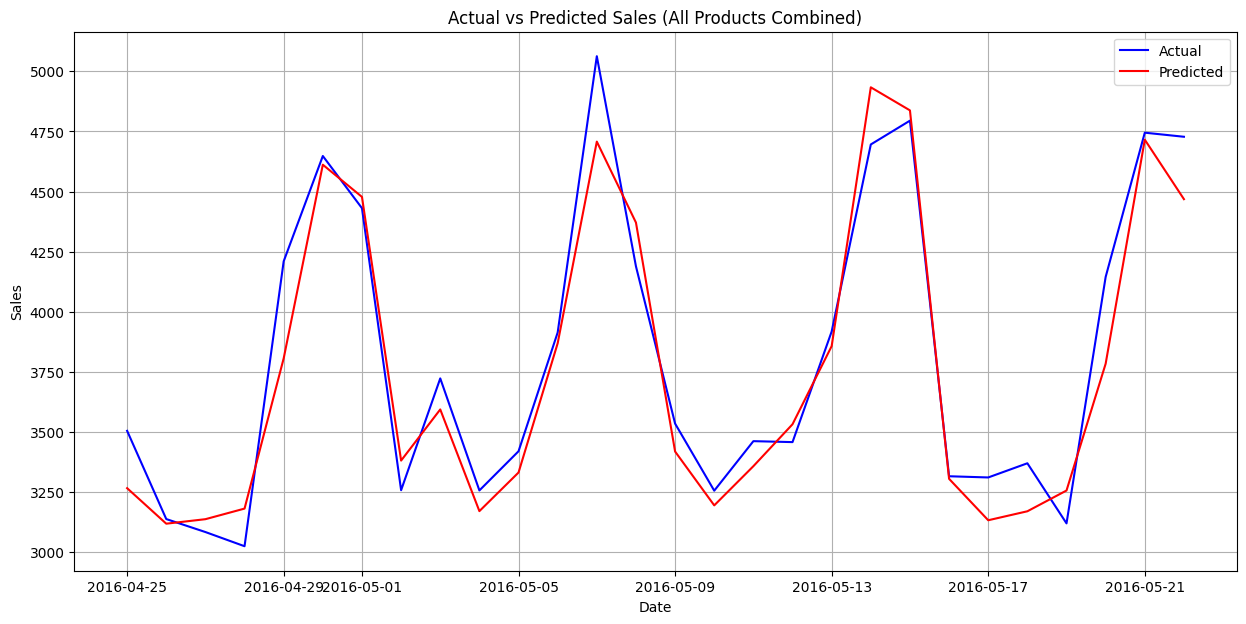

In [21]:
plt.figure(figsize=(15, 7))

predicted_df['date'] = pd.to_datetime(predicted_df['Date'])

grouped = predicted_df.groupby('date').agg({
    'Actual': 'sum',
    'Ensemble_prediction': 'sum'
}).reset_index()

plt.plot(grouped['date'], grouped['Actual'], label='Actual', color='blue')


plt.plot(grouped['date'], grouped['Ensemble_prediction'], label='Predicted', color='red')

plt.legend() 
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (All Products Combined)')

plt.grid(True)
plt.show()

In [23]:
results_df = predicted_df[['Ensemble_prediction','Actual','Date','Product_ID']]

In [26]:
results_df.rename(columns={'Ensemble_prediction':'predicted'}, inplace=True)

C:\Users\Brian Silva\AppData\Local\Temp\ipykernel_3312\4150413546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns={'Ensemble_prediction':'predicted'}, inplace=True)


In [28]:
results_df.to_excel('ensemble_Stacked_LinearReg.xlsx')